In [2]:
using StockFlow
using StockFlow.Syntax
using StockFlow.PremadeModels

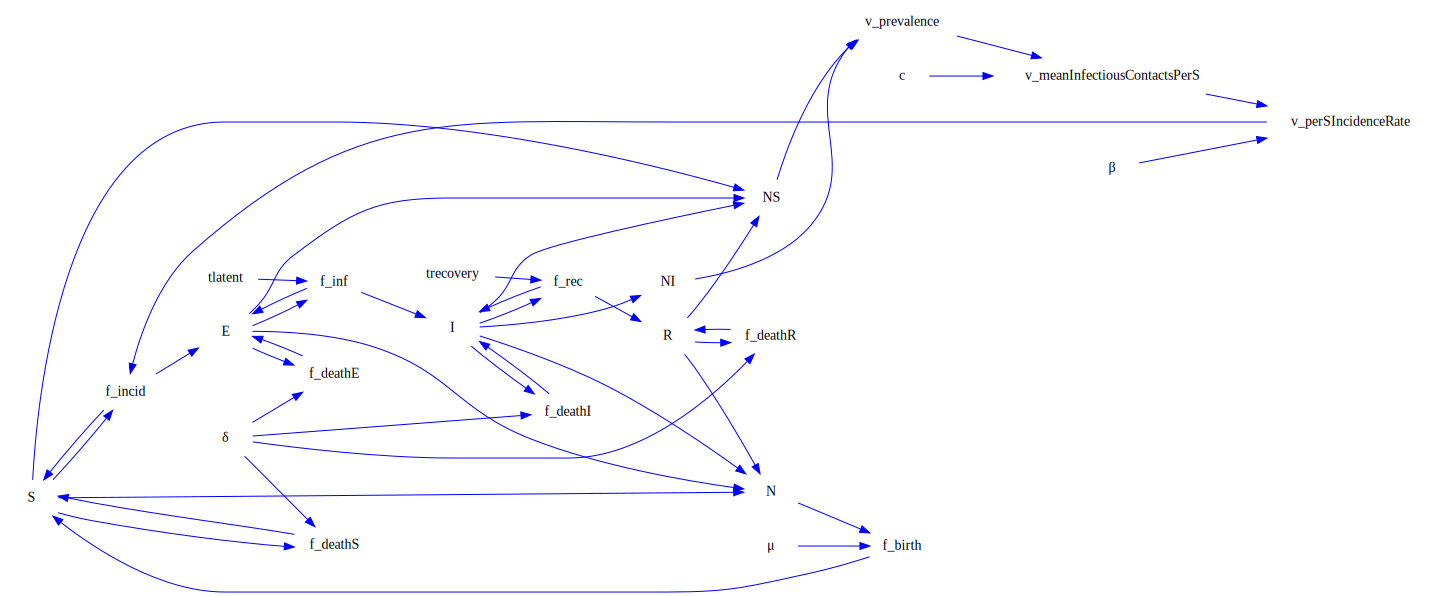

In [3]:
GraphCL(convertToCausalLoop(seir()))

In [4]:
C2 = CausalLoopPM([:C2], [:C2 => :C2 for _ in 1:5], [POL_NEGATIVE, POL_POSITIVE, POL_NEGATIVE, POL_POSITIVE, POL_NEGATIVE])

CausalLoopPM {V:1, P:2, M:3, Name:0}
┌───┬───────┐
│ V │ vname │
├───┼───────┤
│ 1 │    C2 │
└───┴───────┘
┌───┬────┬────┐
│ P │ sp │ tp │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  1 │
└───┴────┴────┘
┌───┬────┬────┐
│ M │ sm │ tm │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  1 │
│ 3 │  1 │  1 │
└───┴────┴────┘

In [5]:
C2′ = @causal_loop begin
    :nodes
    C2
    :edges
    C2 => -C2
    C2 => +C2
    C2 => -C2
    C2 => +C2
    C2 => -C2
end;

In [6]:
C2′′ = (@cl C2 => -C2, C2 => +C2, C2 => -C2, C2 => +C2, C2 => -C2);

In [7]:
C2 == C2′ == C2′′

true

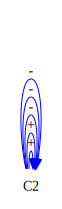

In [8]:
GraphCL(C2)

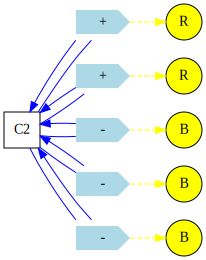

In [9]:
GraphRB(C2)

In [10]:
CL_ABC = @cl A => +B, B => +C, C => -A, D

CausalLoopPM {V:4, P:2, M:1, Name:0}
┌───┬───────┐
│ V │ vname │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
│ 4 │     D │
└───┴───────┘
┌───┬────┬────┐
│ P │ sp │ tp │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  2 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ M │ sm │ tm │
├───┼────┼────┤
│ 1 │  3 │  1 │
└───┴────┴────┘

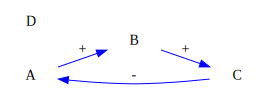

In [11]:
GraphCL(CL_ABC)

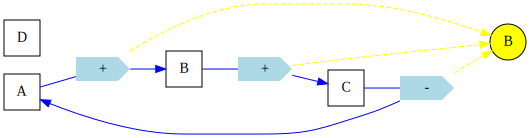

In [12]:
GraphRB(CL_ABC)

In [13]:
nvert(CL_ABC)

4

In [14]:
nedges(CL_ABC)

3

In [15]:
np(CL_ABC)

2

In [16]:
nm(CL_ABC)

1

In [17]:
sedge(CL_ABC, 3) # Source node for edge 3, which is C => A, is C, which is index 3

3

In [18]:
tedge(CL_ABC, 3) # C => A, target is A, with index 1

1

In [19]:
vnames(CL_ABC)

4-element Vector{Symbol}:
 :A
 :B
 :C
 :D

In [20]:
epol(CL_ABC, 1) # Polarity of edge 1, A => B, is positive

POL_POSITIVE::Polarity = 0

In [21]:
epols(CL_ABC)

3-element Vector{Polarity}:
 POL_POSITIVE::Polarity = 0
 POL_POSITIVE::Polarity = 0
 POL_NEGATIVE::Polarity = 1

In [22]:
outgoing_edges(CL_ABC, 1) # indices of all edges with src 1 (in this case, A)

1-element Vector{Int64}:
 1

In [23]:
outgoing_edges(CL_ABC, 4) # D

Int64[]

In [24]:
incoming_edges(CL_ABC, 1) # indices of all edges with src 1

1-element Vector{Int64}:
 3

In [25]:
cl_cycles(CL_ABC)

1-element Vector{Vector{Int64}}:
 [1, 2, 3]

In [26]:
extract_loops(CL_ABC)

Dict{Vector{Int64}, Polarity} with 1 entry:
  [1, 2, 3] => POL_NEGATIVE

In [27]:
is_walk(CL_ABC, [1,2,3,1,2])

true

In [28]:
is_walk(CL_ABC, [3,2])

false

In [29]:
is_walk(CL_ABC, Vector{Int}())

true

In [30]:
is_circuit(CL_ABC, [1,2,3])

true

In [31]:
is_circuit(CL_ABC, [1,2])

false

In [32]:
walk_polarity(CL_ABC, [1,2,3,1,2,3])

POL_POSITIVE::Polarity = 0

In [33]:
extract_all_nonduplicate_paths(CL_ABC)

Dict{Vector{Int64}, Polarity} with 8 entries:
  [2, 3]    => POL_NEGATIVE
  [3]       => POL_NEGATIVE
  []        => POL_POSITIVE
  [1]       => POL_POSITIVE
  [3, 1]    => POL_NEGATIVE
  [1, 2, 3] => POL_NEGATIVE
  [1, 2]    => POL_POSITIVE
  [2]       => POL_POSITIVE

In [34]:
num_loops_var_on(CL_ABC, :D)

0

In [35]:
num_loops_var_on(CL_ABC, :A)

1

In [36]:
num_loops_var_on(C2, :C2)

5

In [37]:
num_indep_loops_var_on(C2, :C2) # Treating each pair of nodes as if there is at most one edge between them

1

In [38]:
to_graphs_graph(CL_ABC)

{4, 3} directed simple Int64 graph

In [39]:
betweenness(CL_ABC)

4-element Vector{Rational{Int64}}:
 1
 1
 1
 0

In [40]:
to_graphs_graph(C2) # eliminates duplicate edges!

{1, 1} directed simple Int64 graph

In [41]:
betweenness(C2)

1-element Vector{Rational{Int64}}:
 0

In [42]:
num_inputs_outputs(C2) # in, out

Dict{Symbol, Tuple{Int64, Int64}} with 1 entry:
  :C2 => (5, 5)

In [43]:
num_inputs_outputs_pols(C2) # pos in, pos out, neg in, neg out

Dict{Symbol, NTuple{4, Int64}} with 1 entry:
  :C2 => (2, 2, 3, 3)

In [44]:
all_shortest_paths(C2) 

1×1 Matrix{Vector{Vector{Int64}}}:
 [[]]

In [45]:
 all_shortest_paths(@cl((A => B, B => C, C => D, A => B′, B′ => C′, C′ => D)))

6×6 Matrix{Vector{Vector{Int64}}}:
 [[]]  [[1]]  [[1, 2]]  [[1, 2, 3], [4, 5, 6]]  [[4]]  [[4, 5]]
 []    [[]]   [[2]]     [[2, 3]]                []     []
 []    []     [[]]      [[3]]                   []     []
 []    []     []        [[]]                    []     []
 []    []     []        [[5, 6]]                [[]]   [[5]]
 []    []     []        [[6]]                   []     [[]]

In [46]:
shortest_paths( (@cl A => B, B => C, C => D, A => B′, B′ => C′, C′ => D), :A, :D )

2-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5, 6]

In [47]:
 betweenness(@cl((A => B, B => C, C => D, A => B′, B′ => C′, C′ => D)))

6-element Vector{Rational{Int64}}:
  0
 3//2
 3//2
  0
 3//2
 3//2

In [48]:
all_shortest_paths(convertToCausalLoop(seir()))

24×24 Matrix{Vector{Vector{Int64}}}:
 [[]]                                        …  []    []    []    []    []    []
 [[3, 12, 20]]                                  []    []    []    []    []    []
 [[5, 12, 20]]                                  []    []    []    []    []    []
 [[8, 12, 20]]                                  []    []    []    []    []    []
 [[20]]                                         []    []    []    []    []    []
 [[24]]                                      …  []    []    []    []    []    []
 [[25]]                                         []    []    []    []    []    []
 [[26, 3, 12, 20], [22, 5, 12, 20]]             []    []    []    []    []    []
 [[27, 3, 12, 20]]                              []    []    []    []    []    []
 [[28, 5, 12, 20], [23, 8, 12, 20]]             []    []    []    []    []    []
 [[29, 5, 12, 20]]                           …  []    []    []    []    []    []
 [[30, 8, 12, 20]]                              []    []    []    []    

In [49]:
all_shortest_paths(CL_ABC)

4×4 Matrix{Vector{Vector{Int64}}}:
 [[]]      [[1]]     [[1, 2]]  []
 [[2, 3]]  [[]]      [[2]]     []
 [[3]]     [[3, 1]]  [[]]      []
 []        []        []        [[]]

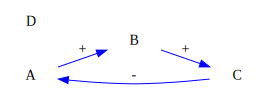

In [50]:
GraphCL(CL_ABC)

In [51]:
shortest_paths(CL_ABC, :A, :C)

1-element Vector{Vector{Int64}}:
 [1, 2]

In [52]:
cl = @causal_loop begin
        :nodes
        A
        B
        C
        D
        E
        :edges
        A => B
        B => C
        B => C
        B => D
        D => C
    end;

In [53]:
cl2 = @causal_loop begin
        :nodes
        A
        B
        C
        D
        E
        :edges
        A => B
        B => C
        B => D
        D => C
    end;

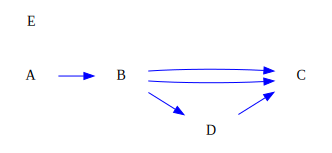

In [54]:
GraphCL(cl)

In [55]:
betweenness(cl)

5-element Vector{Rational{Int64}}:
 0
 2
 0
 0
 0

In [56]:
betweenness(cl2)

5-element Vector{Rational{Int64}}:
 0
 2
 0
 0
 0

### Note, negative polarities always come after positive!

In [57]:
cl_small = @cl A => -B, B => +C 

CausalLoopPM {V:3, P:1, M:1, Name:0}
┌───┬───────┐
│ V │ vname │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
└───┴───────┘
┌───┬────┬────┐
│ P │ sp │ tp │
├───┼────┼────┤
│ 1 │  2 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ M │ sm │ tm │
├───┼────┼────┤
│ 1 │  1 │  2 │
└───┴────┴────┘

In [58]:
epols(cl_small)

2-element Vector{Polarity}:
 POL_POSITIVE::Polarity = 0
 POL_NEGATIVE::Polarity = 1

In [59]:
to_simple_cl(cl_small) == (@cl A, B => C, A => B) # Note the order!

true

In [60]:
to_simple_cl(cl_small)

CausalLoop {V:3, E:2, Name:0}
┌───┬───────┐
│ V │ vname │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
└───┴───────┘
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   2 │   3 │
│ 2 │   1 │   2 │
└───┴─────┴─────┘